In [1]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [2]:
(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()

EDA on Dataset

In [3]:
print('train_images:\t{}'.format(train_images.shape))
print('train_labels:\t{}'.format(train_labels.shape))
print('test_images:\t{}'.format(test_images.shape))
print('test_labels:\t{}'.format(test_labels.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:	(10000, 32, 32, 3)
test_labels:	(10000, 1)


In [4]:
print("First ten labels training dataset:\n {}\n".format(train_labels[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

This output the numeric label, need to convert to item description


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [7]:
x_preview, y_preview = get_three_classes(x_train, y_train)
x_preview, y_preview = get_three_classes(x_test, y_test)

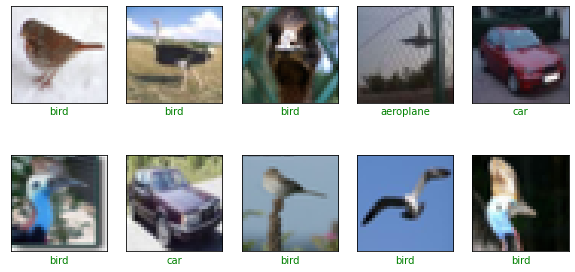

In [8]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

DATA PROCESSING

In [9]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

In [10]:
train_images_norm = train_images.astype('float32')/255.
test_images_norm = test_images.astype('float32')/255.

In [11]:
train_images_norm.shape, test_images_norm.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [12]:
val_images_norm, train_images_norm = train_images_norm[:3000], train_images_norm[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]
print('We have created a validation set for our model so when we train our data we can use this new variable as a parameter')

We have created a validation set for our model so when we train our data we can use this new variable as a parameter


EXPERIMENT 1

In [13]:
experiment1 = models.Sequential()
experiment1.add(layers.Dense(units = 256, activation ='relu', input_shape=(3072,)))
experiment1.add(layers.Dense(units = 256, activation ='relu'))
experiment1.add(layers.Dense(units = 10, activation ='softmax'))

In [14]:
experiment1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
experiment1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_images_norm = np.reshape(train_images_norm, (train_images_norm.shape[0],3072))

In [17]:
val_images_norm = np.reshape(val_images_norm,(val_images_norm.shape[0],3072))

In [18]:
train_labels = to_categorical(train_labels, num_classes=10)
val_labels = to_categorical(val_labels,num_classes=10)

In [19]:
start = datetime.datetime.now()
history = experiment1.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=250
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)]                                                                                                           
                   )
end = datetime.datetime.now()
experiment1CompTime = end-start
print('Computation Time: ', experiment1CompTime)

Epoch 1/100
188/188 [==============================] - 3s 12ms/step - loss: 2.0704 - accuracy: 0.2575 - val_loss: 1.8030 - val_accuracy: 0.3743
Epoch 2/100
188/188 [==============================] - 2s 8ms/step - loss: 1.7975 - accuracy: 0.3707 - val_loss: 1.7075 - val_accuracy: 0.3943
Epoch 3/100
188/188 [==============================] - 2s 8ms/step - loss: 1.6932 - accuracy: 0.4063 - val_loss: 1.6432 - val_accuracy: 0.4203
Epoch 4/100
188/188 [==============================] - 2s 9ms/step - loss: 1.6322 - accuracy: 0.4280 - val_loss: 1.5879 - val_accuracy: 0.4443
Epoch 5/100
188/188 [==============================] - 2s 8ms/step - loss: 1.5896 - accuracy: 0.4466 - val_loss: 1.5726 - val_accuracy: 0.4427
Epoch 6/100
188/188 [==============================] - 2s 8ms/step - loss: 1.5496 - accuracy: 0.4579 - val_loss: 1.5448 - val_accuracy: 0.4553
Epoch 7/100
188/188 [==============================] - 2s 8ms/step - loss: 1.5243 - accuracy: 0.4652 - val_loss: 1.5220 - val_accuracy: 0.464

In [20]:
experiment1DF = pd.DataFrame(history.history)
experiment1DF.iloc[-1]

loss            0.881326
accuracy        0.698404
val_loss        1.310355
val_accuracy    0.563667
Name: 72, dtype: float64

In [21]:
test_labels = to_categorical(test_labels,10)

In [22]:
 test_images_norm = np.reshape(test_images_norm, (test_images_norm.shape[0],3072))

In [23]:
predictionClass = np.argmax(experiment1.predict(test_images_norm),axis=1)
confusion_matrix(y_test,predictionClass)

array([[617,  24,  53,  19,  38,  15,  19,  33, 146,  36],
       [ 40, 620,  15,  17,  15,  11,  19,  28, 105, 130],
       [ 77,  16, 419,  92, 128,  79,  76,  63,  33,  17],
       [ 23,  10,  80, 348,  81, 186, 137,  69,  33,  33],
       [ 51,   8, 131,  60, 464,  58,  94,  93,  32,   9],
       [ 25,   5,  64, 212,  88, 417,  55,  81,  31,  22],
       [  7,   9,  70,  94, 110,  55, 610,  17,  21,   7],
       [ 43,  15,  42,  66,  91,  75,  20, 598,  20,  30],
       [ 90,  43,  11,  22,  22,   9,   7,  16, 739,  41],
       [ 39, 160,  10,  32,  24,  21,  20,  54,  93, 547]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
print(f'Experiment 1 test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 1 test accuracy: 53.790000000000006%


In [25]:
experimentsTrainAcc = [0.516]
experimentsValAcc = [0.495]
experimentsTestAcc = [0.487]

EXPERIMENT 2

In [26]:
experiment2 = models.Sequential()
experiment2.add(layers.Dense(units = 256, activation ='relu', input_shape=(3072,)))
experiment2.add(layers.Dense(units=256, activation='relu'))
experiment2.add(layers.Dense(units=256, activation = 'relu'))
experiment2.add(layers.Dense(units=10, activation='softmax'))

In [27]:
experiment2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 920,842
Trainable params: 920,842
Non-trainable params: 0
_________________________________________________________________


In [28]:
experiment2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [29]:
start = datetime.datetime.now()
history = experiment2.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
                   ]                                                                                                           
                   )
end = datetime.datetime.now()
experiment2CompTime = end-start
print('Computation Time: ', experiment2CompTime)

Epoch 1/100
470/470 [==============================] - 3s 6ms/step - loss: 2.0126 - accuracy: 0.2699 - val_loss: 1.7188 - val_accuracy: 0.3887
Epoch 2/100
470/470 [==============================] - 3s 6ms/step - loss: 1.7157 - accuracy: 0.3951 - val_loss: 1.6456 - val_accuracy: 0.4070
Epoch 3/100
470/470 [==============================] - 3s 6ms/step - loss: 1.6156 - accuracy: 0.4272 - val_loss: 1.5731 - val_accuracy: 0.4297
Epoch 4/100
470/470 [==============================] - 3s 6ms/step - loss: 1.5638 - accuracy: 0.4475 - val_loss: 1.5196 - val_accuracy: 0.4713
Epoch 5/100
470/470 [==============================] - 3s 6ms/step - loss: 1.5160 - accuracy: 0.4662 - val_loss: 1.4809 - val_accuracy: 0.4730
Epoch 6/100
470/470 [==============================] - 3s 6ms/step - loss: 1.4755 - accuracy: 0.4805 - val_loss: 1.4688 - val_accuracy: 0.4660
Epoch 7/100
470/470 [==============================] - 3s 6ms/step - loss: 1.4421 - accuracy: 0.4907 - val_loss: 1.4393 - val_accuracy: 0.4803

In [30]:
predictionClass = np.argmax(experiment2.predict(test_images_norm),axis=1)
confusion_matrix(y_test,predictionClass)

array([[595,  35,  22,  25,  54,  13,  17,  20, 193,  26],
       [ 41, 636,  10,  19,  13,  17,   9,  14, 123, 118],
       [ 83,  18, 305, 104, 198,  93,  91,  55,  41,  12],
       [ 24,  22,  44, 381,  99, 170, 113,  48,  54,  45],
       [ 41,  15,  82,  67, 539,  32, 100,  66,  47,  11],
       [ 21,   9,  42, 217, 105, 403,  58,  61,  55,  29],
       [ 11,  16,  43, 105, 139,  44, 583,  13,  29,  17],
       [ 46,  13,  19,  75, 116,  65,  19, 589,  21,  37],
       [ 80,  45,   1,  20,  31,   9,   4,  14, 754,  42],
       [ 65, 169,   6,  33,  16,  16,  15,  52, 100, 528]], dtype=int64)

In [31]:
print(f'Experiment 2 test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 2 test accuracy: 53.13%


In [32]:
experiment2DF = pd.DataFrame(history.history)
experiment2DF.iloc[-1]

loss            0.851373
accuracy        0.701596
val_loss        1.355799
val_accuracy    0.548333
Name: 43, dtype: float64

In [33]:
experimentsTrainAcc.append(0.573)
experimentsValAcc.append(0.524)
experimentsTestAcc.append(0.511)

EXPERIMENT 3

In [34]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [35]:
vld, x_train = x_train[:3000], x_train[3000:] 
vld_labels, y_train = y_train[:3000], y_train[3000:]

In [3]:
experiment3 = models.Sequential()
experiment3.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment3.add(layers.MaxPool2D((2, 2),strides=2))
experiment3.add(layers.Dropout(0.3))
experiment3.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment3.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment3.add(layers.Dropout(0.3))
experiment3.add(layers.Flatten())
experiment3.add(layers.Dense(units=128, activation=tf.nn.relu))
experiment3.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [4]:
experiment3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [5]:
experiment3.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
start = datetime.datetime.now()
history = experiment3.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                                                             
                   )
end = datetime.datetime.now()
experiment3CompTime = end-start
print('Computation Time: ', experiment3CompTime)

Epoch 1/100
470/470 [==============================] - 34s 69ms/step - loss: 2.1470 - accuracy: 0.2028 - val_loss: 1.7941 - val_accuracy: 0.3667
Epoch 2/100
470/470 [==============================] - 32s 67ms/step - loss: 1.7105 - accuracy: 0.3958 - val_loss: 1.5976 - val_accuracy: 0.4437
Epoch 3/100
470/470 [==============================] - 32s 68ms/step - loss: 1.5624 - accuracy: 0.4431 - val_loss: 1.4905 - val_accuracy: 0.4850
Epoch 4/100
470/470 [==============================] - 32s 67ms/step - loss: 1.4734 - accuracy: 0.4776 - val_loss: 1.4028 - val_accuracy: 0.5117
Epoch 5/100
470/470 [==============================] - 32s 67ms/step - loss: 1.3950 - accuracy: 0.5046 - val_loss: 1.3422 - val_accuracy: 0.5347
Epoch 6/100
470/470 [==============================] - 32s 68ms/step - loss: 1.3229 - accuracy: 0.5345 - val_loss: 1.2803 - val_accuracy: 0.5600
Epoch 7/100
470/470 [==============================] - 31s 65ms/step - loss: 1.2843 - accuracy: 0.5498 - val_loss: 1.2309 - val_ac

470/470 [==============================] - 31s 67ms/step - loss: 0.6343 - accuracy: 0.7799 - val_loss: 0.7474 - val_accuracy: 0.7477
Epoch 58/100
470/470 [==============================] - 31s 67ms/step - loss: 0.6345 - accuracy: 0.7813 - val_loss: 0.7487 - val_accuracy: 0.7447
Epoch 59/100
470/470 [==============================] - 31s 67ms/step - loss: 0.6292 - accuracy: 0.7824 - val_loss: 0.7592 - val_accuracy: 0.7443
Epoch 60/100
470/470 [==============================] - 31s 67ms/step - loss: 0.6233 - accuracy: 0.7872 - val_loss: 0.7432 - val_accuracy: 0.7493
Epoch 61/100
470/470 [==============================] - 32s 68ms/step - loss: 0.6146 - accuracy: 0.7880 - val_loss: 0.7425 - val_accuracy: 0.7503
Epoch 62/100
470/470 [==============================] - 32s 67ms/step - loss: 0.6163 - accuracy: 0.7872 - val_loss: 0.7468 - val_accuracy: 0.7477
Epoch 63/100
470/470 [==============================] - 31s 67ms/step - loss: 0.6046 - accuracy: 0.7931 - val_loss: 0.7516 - val_accuracy

In [49]:
print('Experiment 3 result Testing')
accuracyAndMatrix(experiment3)

Experiment 3 result Testing
[[788  14  45   8  25   7   7  12  72  22]
 [ 22 839   8   4   2   6   9   3  25  82]
 [ 52   7 590  52  98  63  72  36  19  11]
 [ 25  14  53 589  70 134  49  29  20  17]
 [ 20   4  56  47 716  36  47  60   9   5]
 [ 23   4  48 172  42 626  18  50   9   8]
 [  8   7  30  52  49  19 818   8   8   1]
 [ 21   6  26  34  47  37   7 810   3   9]
 [ 38  38  14  17   7   5   5   4 855  17]
 [ 31  89   5  16   8   5   7  20  31 788]]


Experiment test accuracy: 74.19%


In [47]:
def accuracyAndMatrix(model):
    predictionClass = np.argmax(model.predict(x_test),axis=1)
    print(confusion_matrix(y_test,predictionClass))
    print('\n')
    print(f'Experiment test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
vld, x_train = x_train[:3000], x_train[3000:] 
vld_labels, y_train = y_train[:3000], y_train[3000:]
y_train_cat = to_categorical(y_train, num_classes=10)
vld_labels_cat = to_categorical(vld_labels,num_classes=10)

In [42]:
experiment4 = models.Sequential()
experiment4.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment4.add(layers.MaxPool2D((2, 2),strides=2))
experiment4.add(layers.Dropout(0.3))
experiment4.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment4.add(layers.Dropout(0.3))
experiment4.add(layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment4.add(layers.Dropout(0.3))
experiment4.add(layers.Flatten())
experiment4.add(layers.Dense(units=128, activation=tf.nn.relu))
experiment4.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [43]:
experiment4.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [45]:
start = datetime.datetime.now()
history = experiment4.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                                                             
                   )
end = datetime.datetime.now()
experiment4CompTime = end-start
print('Computation Time: ', experiment4CompTime)

Epoch 1/100
470/470 [==============================] - 40s 84ms/step - loss: 2.1929 - accuracy: 0.1739 - val_loss: 1.8610 - val_accuracy: 0.3503
Epoch 2/100
470/470 [==============================] - 39s 83ms/step - loss: 1.7849 - accuracy: 0.3544 - val_loss: 1.6518 - val_accuracy: 0.4207
Epoch 3/100
470/470 [==============================] - 39s 83ms/step - loss: 1.6129 - accuracy: 0.4145 - val_loss: 1.5194 - val_accuracy: 0.4733
Epoch 4/100
470/470 [==============================] - 39s 82ms/step - loss: 1.5174 - accuracy: 0.4512 - val_loss: 1.4464 - val_accuracy: 0.4880
Epoch 5/100
470/470 [==============================] - 38s 81ms/step - loss: 1.4554 - accuracy: 0.4761 - val_loss: 1.4032 - val_accuracy: 0.5133
Epoch 6/100
470/470 [==============================] - 38s 81ms/step - loss: 1.4026 - accuracy: 0.5025 - val_loss: 1.3343 - val_accuracy: 0.5390
Epoch 7/100
470/470 [==============================] - 38s 82ms/step - loss: 1.3663 - accuracy: 0.5158 - val_loss: 1.2871 - val_ac

In [50]:
print('Experiment 4 testing')
accuracyAndMatrix(experiment4)

Experiment 4 testing
[[803  11  27  12  21   4   9  12  72  29]
 [ 11 859   4   6   2   1  10   1  35  71]
 [ 46   5 657  62  90  40  66  14  13   7]
 [ 18   6  45 669  67  94  51  17  18  15]
 [ 13   2  40  46 788  28  40  29  10   4]
 [ 11   2  22 194  47 647  20  41   9   7]
 [  6   3  24  50  26  14 859   4  11   3]
 [ 11   2  18  37  56  44   4 808  10  10]
 [ 31  13   2  12   6   3   3   1 914  15]
 [ 26  47   4  15   4   4  11  11  22 856]]


Experiment test accuracy: 78.60000000000001%


EXPERIMENT 5a

In [55]:
experiment5a = models.Sequential()
experiment5a.add(layers.Dense(units = 256, activation ='relu', input_shape=(3072,),kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5a.add(layers.Dense(units = 256, activation ='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5a.add(layers.Dense(units = 10, activation ='softmax'))

In [56]:
experiment5a.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
start = datetime.datetime.now()
history = experiment5a.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=250
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)]                                                                                                           
                   )
end = datetime.datetime.now()
experiment5aCompTime = end-start
print('Computation Time: ', experiment5aCompTime)

Epoch 1/100
188/188 [==============================] - 3s 13ms/step - loss: 2.7866 - accuracy: 0.2524 - val_loss: 2.4117 - val_accuracy: 0.3760
Epoch 2/100
188/188 [==============================] - 2s 12ms/step - loss: 2.3898 - accuracy: 0.3739 - val_loss: 2.2663 - val_accuracy: 0.3910
Epoch 3/100
188/188 [==============================] - 2s 12ms/step - loss: 2.2483 - accuracy: 0.4042 - val_loss: 2.1599 - val_accuracy: 0.4213
Epoch 4/100
188/188 [==============================] - 2s 10ms/step - loss: 2.1605 - accuracy: 0.4273 - val_loss: 2.0964 - val_accuracy: 0.4253
Epoch 5/100
188/188 [==============================] - 2s 10ms/step - loss: 2.0893 - accuracy: 0.4402 - val_loss: 2.0749 - val_accuracy: 0.4170
Epoch 6/100
188/188 [==============================] - 2s 10ms/step - loss: 2.0335 - accuracy: 0.4517 - val_loss: 2.0003 - val_accuracy: 0.4557
Epoch 7/100
188/188 [==============================] - 2s 10ms/step - loss: 1.9903 - accuracy: 0.4616 - val_loss: 1.9935 - val_accuracy:

In [59]:
print('Experiment 5a test')
predictionClass = np.argmax(experiment5a.predict(test_images_norm),axis=1)
confusion_matrix(y_test,predictionClass)

Experiment 5a test


array([[645,  50,  37,  18,  11,  12,  50,  22, 102,  53],
       [ 22, 737,  12,  13,   5,  14,  30,  14,  35, 118],
       [106,  28, 392,  75,  59,  71, 193,  48,  14,  14],
       [ 34,  28,  68, 299,  31, 184, 250,  43,  21,  42],
       [ 72,  21, 160,  54, 283,  41, 248,  79,  26,  16],
       [ 27,  17,  89, 191,  35, 379, 151,  61,  21,  29],
       [  8,  15,  46,  36,  38,  31, 791,  15,  12,   8],
       [ 47,  28,  62,  64,  46,  75,  65, 548,  11,  54],
       [127, 105,  10,  12,  10,  14,  30,   7, 636,  49],
       [ 40, 210,   5,  24,   4,  15,  47,  28,  43, 584]], dtype=int64)

In [60]:
print(f'Experiment 5a test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 5a test accuracy: 52.94%


EXPERIMENT 5b

In [62]:
experiment5b = models.Sequential()
experiment5b.add(layers.Dense(units = 256, activation ='relu', input_shape=(3072,),kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5b.add(layers.Dense(units=256, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5b.add(layers.Dense(units=256, activation = 'relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5b.add(layers.Dense(units=10, activation='softmax'))

In [63]:
experiment5b.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
start = datetime.datetime.now()
history = experiment5b.fit(train_images_norm
                    ,train_labels
                    ,epochs=100
                    ,batch_size=250
                    ,validation_data=(val_images_norm,val_labels)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)]                                                                                                           
                   )
end = datetime.datetime.now()
experiment5bCompTime = end-start
print('Computation Time: ', experiment5bCompTime)

Epoch 1/100
188/188 [==============================] - 4s 17ms/step - loss: 2.9919 - accuracy: 0.2541 - val_loss: 2.5827 - val_accuracy: 0.3697
Epoch 2/100
188/188 [==============================] - 2s 13ms/step - loss: 2.5472 - accuracy: 0.3737 - val_loss: 2.3896 - val_accuracy: 0.3990
Epoch 3/100
188/188 [==============================] - 2s 12ms/step - loss: 2.3640 - accuracy: 0.4079 - val_loss: 2.2565 - val_accuracy: 0.4213
Epoch 4/100
188/188 [==============================] - 2s 11ms/step - loss: 2.2553 - accuracy: 0.4283 - val_loss: 2.2020 - val_accuracy: 0.4257
Epoch 5/100
188/188 [==============================] - 2s 11ms/step - loss: 2.1808 - accuracy: 0.4408 - val_loss: 2.1288 - val_accuracy: 0.4513
Epoch 6/100
188/188 [==============================] - 2s 11ms/step - loss: 2.1143 - accuracy: 0.4576 - val_loss: 2.0891 - val_accuracy: 0.4503
Epoch 7/100
188/188 [==============================] - 2s 11ms/step - loss: 2.0805 - accuracy: 0.4686 - val_loss: 2.0576 - val_accuracy:

In [65]:
print('Experiment 5b test')
predictionClass = np.argmax(experiment5b.predict(test_images_norm),axis=1)
confusion_matrix(y_test,predictionClass)

Experiment 5b test


array([[501,  51,  46,  10,  46,  39,  35,  19, 189,  64],
       [ 18, 731,   8,  18,   8,  26,  21,  14,  56, 100],
       [ 57,  22, 346,  50, 176, 152, 111,  46,  22,  18],
       [ 18,  29,  49, 267,  65, 334, 135,  37,  26,  40],
       [ 28,  15,  90,  36, 485, 102, 128,  70,  34,  12],
       [  8,  12,  44, 134,  74, 575,  68,  47,  22,  16],
       [  5,  15,  36,  57, 101,  73, 664,  17,  15,  17],
       [ 21,  18,  37,  36, 100, 132,  27, 559,  18,  52],
       [ 49,  91,  11,  16,  19,  35,  11,   6, 723,  39],
       [ 15, 224,  11,  27,  14,  36,  15,  31,  66, 561]], dtype=int64)

In [66]:
print(f'Experiment 5b test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 5b test accuracy: 54.120000000000005%


EXPERIMENT 5c

In [3]:
experiment5c = models.Sequential()
experiment5c.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment5c.add(layers.MaxPool2D((2, 2),strides=2))
experiment5c.add(layers.Dropout(0.3))
experiment5c.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment5c.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment5c.add(layers.Dropout(0.3))
experiment5c.add(layers.Flatten())
experiment5c.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5c.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [4]:
experiment5c.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
start = datetime.datetime.now()
history = experiment5c.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                                                             
                   )
end = datetime.datetime.now()
experiment5cCompTime = end-start
print('Computation Time: ', experiment5cCompTime)

Epoch 1/100
470/470 [==============================] - 36s 76ms/step - loss: 1.8062 - accuracy: 0.4158 - val_loss: 1.7359 - val_accuracy: 0.4373
Epoch 2/100
470/470 [==============================] - 35s 74ms/step - loss: 1.6594 - accuracy: 0.4641 - val_loss: 1.6098 - val_accuracy: 0.4847
Epoch 3/100
470/470 [==============================] - 35s 74ms/step - loss: 1.5682 - accuracy: 0.4943 - val_loss: 1.5070 - val_accuracy: 0.5193
Epoch 4/100
470/470 [==============================] - 35s 74ms/step - loss: 1.5007 - accuracy: 0.5159 - val_loss: 1.4483 - val_accuracy: 0.5473
Epoch 5/100
470/470 [==============================] - 35s 74ms/step - loss: 1.4460 - accuracy: 0.5326 - val_loss: 1.4132 - val_accuracy: 0.5490
Epoch 6/100
470/470 [==============================] - 35s 74ms/step - loss: 1.4046 - accuracy: 0.5480 - val_loss: 1.3582 - val_accuracy: 0.5763
Epoch 7/100
470/470 [==============================] - 35s 74ms/step - loss: 1.3672 - accuracy: 0.5613 - val_loss: 1.3332 - val_ac

In [8]:
experiment5d = models.Sequential()
experiment5d.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment5d.add(layers.MaxPool2D((2, 2),strides=2))
experiment5d.add(layers.Dropout(0.3))
experiment5d.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment5d.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment5d.add(layers.Dropout(0.3))
experiment5d.add(layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment5d.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment5d.add(layers.Dropout(0.3))
experiment5d.add(layers.Flatten())
experiment5d.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment5d.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [9]:
experiment5d.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-8), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [10]:
start = datetime.datetime.now()
history = experiment5d.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                                                             
                   )
end = datetime.datetime.now()
experiment5dCompTime = end-start
print('Computation Time: ', experiment5dCompTime)

Epoch 1/100
470/470 [==============================] - 40s 85ms/step - loss: 2.3976 - accuracy: 0.1797 - val_loss: 2.0570 - val_accuracy: 0.3267
Epoch 2/100
470/470 [==============================] - 40s 85ms/step - loss: 1.9368 - accuracy: 0.3674 - val_loss: 1.8223 - val_accuracy: 0.3983
Epoch 3/100
470/470 [==============================] - 40s 85ms/step - loss: 1.7660 - accuracy: 0.4144 - val_loss: 1.7112 - val_accuracy: 0.4357
Epoch 4/100
470/470 [==============================] - 40s 84ms/step - loss: 1.6744 - accuracy: 0.4461 - val_loss: 1.6032 - val_accuracy: 0.4653
Epoch 5/100
470/470 [==============================] - 39s 84ms/step - loss: 1.5880 - accuracy: 0.4718 - val_loss: 1.5147 - val_accuracy: 0.5060
Epoch 6/100
470/470 [==============================] - 39s 83ms/step - loss: 1.5282 - accuracy: 0.4963 - val_loss: 1.4601 - val_accuracy: 0.5297
Epoch 7/100
470/470 [==============================] - 40s 85ms/step - loss: 1.4803 - accuracy: 0.5147 - val_loss: 1.3912 - val_ac

In [11]:
experiment6 = models.Sequential()
experiment6.add(layers.Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment6.add(layers.MaxPool2D((2, 2),strides=2))
experiment6.add(layers.Dropout(0.3))
experiment6.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment6.add(layers.MaxPool2D((2, 2),strides=2))
experiment6.add(layers.Dropout(0.3))
experiment6.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment6.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment6.add(layers.Dropout(0.3))
experiment6.add(layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment6.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
experiment6.add(layers.Dropout(0.3))
experiment6.add(layers.Flatten())
experiment6.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment6.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment6.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [12]:
experiment6.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [13]:
start = datetime.datetime.now()
history = experiment6.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                                                             
                   )
end = datetime.datetime.now()
experiment5dCompTime = end-start
print('Computation Time: ', experiment6CompTime)

Epoch 1/100
470/470 [==============================] - 21s 44ms/step - loss: 2.5177 - accuracy: 0.1519 - val_loss: 2.2878 - val_accuracy: 0.2433
Epoch 2/100
470/470 [==============================] - 20s 44ms/step - loss: 2.1645 - accuracy: 0.2702 - val_loss: 2.1070 - val_accuracy: 0.2880
Epoch 3/100
470/470 [==============================] - 21s 44ms/step - loss: 1.9710 - accuracy: 0.3420 - val_loss: 1.9472 - val_accuracy: 0.3443
Epoch 4/100
470/470 [==============================] - 20s 43ms/step - loss: 1.7985 - accuracy: 0.4002 - val_loss: 1.7006 - val_accuracy: 0.4340
Epoch 5/100
470/470 [==============================] - 20s 43ms/step - loss: 1.6848 - accuracy: 0.4372 - val_loss: 1.7708 - val_accuracy: 0.4230
Epoch 6/100
470/470 [==============================] - 20s 43ms/step - loss: 1.5903 - accuracy: 0.4646 - val_loss: 1.5168 - val_accuracy: 0.4907
Epoch 7/100
470/470 [==============================] - 20s 43ms/step - loss: 1.5028 - accuracy: 0.4944 - val_loss: 1.5110 - val_ac

NameError: name 'experiment6CompTime' is not defined

In [65]:
compTime.append('0H:17M:53.535S')

In [17]:
from tensorflow.keras.layers import BatchNormalization
experiment7 = models.Sequential()
experiment7.add(layers.Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment7.add(BatchNormalization())

experiment7.add(layers.Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment7.add(BatchNormalization())
experiment7.add(layers.MaxPool2D((2, 2)))
experiment7.add(layers.Dropout(0.3))

experiment7.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment7.add(BatchNormalization())
experiment7.add(layers.Dropout(0.3))

experiment7.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment7.add(BatchNormalization())
experiment7.add(layers.MaxPool2D(pool_size=(2, 2)))
experiment7.add(layers.Dropout(0.3))
experiment7.add(layers.Flatten())

experiment7.add(layers.Dense(units=512, activation=tf.nn.relu))
experiment7.add(BatchNormalization())
experiment7.add(layers.Dropout(0.5))
experiment7.add(layers.Dense(units=128, activation=tf.nn.relu))
experiment7.add(BatchNormalization())
experiment7.add(layers.Dropout(0.5))

experiment7.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [18]:
experiment7.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3,  beta_1=0.9, beta_2=0.999,epsilon=10e-8), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
start = datetime.datetime.now()
history = experiment7.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)],
                                                             
                   )
end = datetime.datetime.now()
experiment7CompTime = end-start
print('Computation Time: ', experiment7CompTime)

Epoch 1/100
470/470 [==============================] - 85s 178ms/step - loss: 2.1297 - accuracy: 0.3318 - val_loss: 2.6355 - val_accuracy: 0.2467
Epoch 2/100
470/470 [==============================] - 84s 178ms/step - loss: 1.2835 - accuracy: 0.5417 - val_loss: 1.8930 - val_accuracy: 0.4247
Epoch 3/100
470/470 [==============================] - 84s 178ms/step - loss: 1.1046 - accuracy: 0.6096 - val_loss: 1.2028 - val_accuracy: 0.5810
Epoch 4/100
470/470 [==============================] - 83s 176ms/step - loss: 0.9994 - accuracy: 0.6513 - val_loss: 1.1840 - val_accuracy: 0.5903
Epoch 5/100
470/470 [==============================] - 82s 175ms/step - loss: 0.9345 - accuracy: 0.6732 - val_loss: 0.9517 - val_accuracy: 0.6773
Epoch 6/100
470/470 [==============================] - 81s 172ms/step - loss: 0.8794 - accuracy: 0.6921 - val_loss: 0.9577 - val_accuracy: 0.6827
Epoch 7/100
470/470 [==============================] - 81s 173ms/step - loss: 0.8407 - accuracy: 0.7064 - val_loss: 1.1518 -

In [10]:

experiment8 = models.Sequential()
experiment8.add(layers.Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment8.add(BatchNormalization())

experiment8.add(layers.Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment8.add(BatchNormalization())
experiment8.add(layers.MaxPool2D((2, 2)))
experiment8.add(layers.Dropout(0.3))

experiment8.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment8.add(BatchNormalization())
experiment8.add(layers.Dropout(0.3))

experiment8.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment8.add(BatchNormalization())
experiment8.add(layers.MaxPool2D(pool_size=(2, 2)))
experiment8.add(layers.Dropout(0.3))
experiment8.add(layers.Flatten())

experiment8.add(layers.Dense(units=1024, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment8.add(BatchNormalization())
experiment8.add(layers.Dropout(0.5))
experiment8.add(layers.Dense(units=512, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment8.add(BatchNormalization())
experiment8.add(layers.Dropout(0.5))

experiment8.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [11]:
experiment8.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
start = datetime.datetime.now()
history = experiment8.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25)],
                                                             
                   )
end = datetime.datetime.now()
experiment8CompTime = end-start
print('Computation Time: ', experiment8CompTime)

Epoch 1/100
470/470 [==============================] - 90s 190ms/step - loss: 5.1269 - accuracy: 0.2189 - val_loss: 5.1581 - val_accuracy: 0.1793
Epoch 2/100
470/470 [==============================] - 89s 190ms/step - loss: 4.1342 - accuracy: 0.3681 - val_loss: 3.8649 - val_accuracy: 0.4167
Epoch 3/100
470/470 [==============================] - 91s 193ms/step - loss: 3.8613 - accuracy: 0.4274 - val_loss: 3.8056 - val_accuracy: 0.4467
Epoch 4/100
470/470 [==============================] - 90s 191ms/step - loss: 3.7070 - accuracy: 0.4691 - val_loss: 4.1079 - val_accuracy: 0.3587
Epoch 5/100
470/470 [==============================] - 90s 191ms/step - loss: 3.5983 - accuracy: 0.4903 - val_loss: 3.6576 - val_accuracy: 0.4640
Epoch 6/100
470/470 [==============================] - 89s 190ms/step - loss: 3.5049 - accuracy: 0.5091 - val_loss: 3.7688 - val_accuracy: 0.4463
Epoch 7/100
470/470 [==============================] - 89s 190ms/step - loss: 3.4159 - accuracy: 0.5294 - val_loss: 3.5654 -

In [67]:
compTime.append('2H:29M:02.813S')

In [40]:
print('Experiment 8 test')
predictionClass = np.argmax(experiment8.predict(x_test),axis=1)
confusion_matrix(y_test,predictionClass)

Experiment 8 test


array([[731,  10,  50,  14,  15,   5,  20,   9, 131,  15],
       [  9, 866,   4,   3,   4,   1,  23,   1,  43,  46],
       [ 37,   0, 687,  31,  85,  31,  98,  11,  17,   3],
       [  7,   0,  44, 617,  64, 108, 119,  19,  17,   5],
       [  3,   0,  34,  33, 821,  12,  68,  19,   9,   1],
       [  4,   0,  30, 149,  65, 676,  49,  23,   4,   0],
       [  2,   0,  17,  14,  14,   4, 943,   2,   4,   0],
       [  4,   0,  19,  33,  74,  42,  15, 799,   7,   7],
       [ 15,   5,  14,   4,   3,   2,  12,   0, 936,   9],
       [ 17,  17,   4,   8,   5,   3,  20,   5,  55, 866]], dtype=int64)

In [42]:
print(f'Experiment 8 test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 8 test accuracy: 79.42%


In [2]:
from tensorflow.keras.layers import BatchNormalization

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
vld, x_train = x_train[:3000], x_train[3000:] 
vld_labels, y_train = y_train[:3000], y_train[3000:]
y_train_cat = to_categorical(y_train, num_classes=10)
vld_labels_cat = to_categorical(vld_labels,num_classes=10)

In [13]:
experiment9 = models.Sequential()
experiment9.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment9.add(BatchNormalization())

experiment9.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment9.add(BatchNormalization())
experiment9.add(layers.MaxPool2D((2, 2)))
experiment9.add(layers.Dropout(0.3))

experiment9.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment9.add(BatchNormalization())
experiment9.add(layers.Dropout(0.3))

experiment9.add(layers.Conv2D(filters=256, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment9.add(BatchNormalization())
experiment9.add(layers.MaxPool2D(pool_size=(2, 2)))
experiment9.add(layers.Dropout(0.3))
experiment9.add(layers.Flatten())

experiment9.add(layers.Dense(units=1024, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment9.add(BatchNormalization())
experiment9.add(layers.Dropout(0.5))
experiment9.add(layers.Dense(units=512, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
experiment9.add(BatchNormalization())
experiment9.add(layers.Dropout(0.5))

experiment9.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [14]:
experiment9.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
start = datetime.datetime.now()
history = experiment9.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25)],
                                                             
                   )
end = datetime.datetime.now()
experiment9CompTime = end-start
print('Computation Time: ', experiment9CompTime)

Epoch 1/100
470/470 [==============================] - 169s 357ms/step - loss: 5.1944 - accuracy: 0.2425 - val_loss: 5.1670 - val_accuracy: 0.2067
Epoch 2/100
470/470 [==============================] - 167s 356ms/step - loss: 4.1807 - accuracy: 0.4022 - val_loss: 4.2994 - val_accuracy: 0.3880
Epoch 3/100
470/470 [==============================] - 167s 356ms/step - loss: 3.9065 - accuracy: 0.4746 - val_loss: 4.1943 - val_accuracy: 0.3877
Epoch 4/100
470/470 [==============================] - 167s 356ms/step - loss: 3.7585 - accuracy: 0.5108 - val_loss: 4.0495 - val_accuracy: 0.4217
Epoch 5/100
470/470 [==============================] - 168s 358ms/step - loss: 3.6353 - accuracy: 0.5432 - val_loss: 4.3762 - val_accuracy: 0.3420
Epoch 6/100
470/470 [==============================] - 168s 357ms/step - loss: 3.5405 - accuracy: 0.5564 - val_loss: 4.1213 - val_accuracy: 0.3997
Epoch 7/100
470/470 [==============================] - 167s 356ms/step - loss: 3.4383 - accuracy: 0.5787 - val_loss: 4

In [44]:
print('Experiment 9 test')
predictionClass = np.argmax(experiment9.predict(x_test),axis=1)
confusion_matrix(y_test,predictionClass)
print(f'Experiment 9 test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 9 test
Experiment 9 test accuracy: 78.69%


In [22]:
experiment10 = models.Sequential()
experiment10.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
experiment10.add(BatchNormalization())

experiment10.add(layers.Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment10.add(BatchNormalization())
experiment10.add(layers.MaxPool2D((2, 2)))
experiment10.add(layers.Dropout(0.3))

experiment10.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment10.add(BatchNormalization())
experiment10.add(layers.Dropout(0.3))

experiment10.add(layers.Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), activation=tf.nn.relu))
experiment10.add(BatchNormalization())
experiment10.add(layers.MaxPool2D(pool_size=(2, 2)))
experiment10.add(layers.Dropout(0.3))
experiment10.add(layers.Flatten())

experiment10.add(layers.Dense(units=512, activation=tf.nn.relu))
experiment10.add(BatchNormalization())
experiment10.add(layers.Dropout(0.5))
experiment10.add(layers.Dense(units=128, activation=tf.nn.relu))
experiment10.add(BatchNormalization())
experiment10.add(layers.Dropout(0.5))

experiment10.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [23]:
experiment10.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=10e-8), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
start = datetime.datetime.now()
history = experiment10.fit(x_train
                    ,y_train_cat
                    ,epochs=100
                    ,batch_size=100
                    ,validation_data=(vld,vld_labels_cat)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25)],
                                                             
                   )
end = datetime.datetime.now()
experiment10CompTime = end-start
print('Computation Time: ', experiment10CompTime)

Epoch 1/100
470/470 [==============================] - 134s 282ms/step - loss: 2.8840 - accuracy: 0.2024 - val_loss: 2.7108 - val_accuracy: 0.2293
Epoch 2/100
470/470 [==============================] - 132s 280ms/step - loss: 2.0359 - accuracy: 0.3511 - val_loss: 1.5984 - val_accuracy: 0.4400
Epoch 3/100
470/470 [==============================] - 132s 280ms/step - loss: 1.7671 - accuracy: 0.4079 - val_loss: 1.5282 - val_accuracy: 0.4680
Epoch 4/100
470/470 [==============================] - 132s 280ms/step - loss: 1.5956 - accuracy: 0.4538 - val_loss: 1.5141 - val_accuracy: 0.4650
Epoch 5/100
470/470 [==============================] - 131s 280ms/step - loss: 1.4679 - accuracy: 0.4838 - val_loss: 1.5602 - val_accuracy: 0.4773
Epoch 6/100
470/470 [==============================] - 132s 280ms/step - loss: 1.3762 - accuracy: 0.5182 - val_loss: 1.5727 - val_accuracy: 0.4703
Epoch 7/100
470/470 [==============================] - 131s 280ms/step - loss: 1.2941 - accuracy: 0.5428 - val_loss: 1

In [69]:
compTime.append('3H:38M:15.426S')

In [48]:
print('Experiment 10 test')
predictionClass = np.argmax(experiment10.predict(x_test),axis=1)
confusion_matrix(y_test,predictionClass)

Experiment 10 test


array([[846,   9,  28,   8,   9,   1,   6,   6,  70,  17],
       [  9, 910,   0,   3,   2,   0,   8,   1,  32,  35],
       [ 52,   2, 730,  23,  73,  26,  62,   9,  20,   3],
       [ 19,   5,  62, 602,  71,  98,  77,  24,  31,  11],
       [ 15,   1,  39,  22, 847,  10,  37,  16,  10,   3],
       [ 11,   0,  38, 117,  65, 709,  19,  24,  13,   4],
       [  2,   1,  25,  22,  19,   5, 920,   1,   5,   0],
       [ 13,   2,  19,  14,  57,  26,   4, 847,   7,  11],
       [ 24,  10,   3,   2,   1,   2,   5,   4, 938,  11],
       [ 22,  45,   4,   1,   4,   0,   6,   4,  31, 883]], dtype=int64)

In [49]:
print(f'Experiment 10 test accuracy: {accuracy_score(y_test, predictionClass)*100}%')

Experiment 10 test accuracy: 82.32000000000001%


In [54]:
experiments = []
for i in range(1,11):
    if i == 5:
        experiments.append('Experiments 5a')
        experiments.append('Experiments 5b')
        experiments.append('Experiments 5c')
        experiments.append('Experiments 5d')
        continue
    experiments.append(f'Experiments {i}')

In [71]:
architecture = ['DNN', 'DNN', 'CNN', 'CNN', 'DNN', 'DNN', 'CNN', 'CNN','CNN','CNN','CNN','CNN','CNN']
optimizer = ['Adam','Adam','Adam','Adam','Adam','Adam','Adam','Adam','SGD','Adam','SGD','SGD','Adam']
layers = [2,3,2,3,2,3,2,3,4,4,4,4,4]

In [79]:
regularized = ['No','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes']

In [80]:
summaryDF = pd.DataFrame ({
    'Experiment' : experiments,
    'Architecture' : architecture,
    'Optimizer': optimizer,
    'Layers': layers,
    'Train Accuracy' : trainAcc,
    'Validation Accuracy' : vldAcc,
    'Test Accuracy' : testAcc,
    'Regularized?': regularized,
    'Computation Time': compTime
})

In [81]:
summaryDF.set_index('Experiment')

,Architecture,Optimizer,Layers,Train Accuracy,Validation Accuracy,Test Accuracy,Regularized?,Computation Time
Experiment,,,,,,,,
Experiments 1,DNN,Adam,2,70.0%,56.6%,53.03%,No,0H:01M:56.462S
Experiments 2,DNN,Adam,3,70.80%,53.80%,53.13%,No,0H:02M:0.888S
Experiments 3,CNN,Adam,2,87.35%,75.67%,74.19%,No,0H:53M:36.442S
Experiments 4,CNN,Adam,3,83.71%,80.70%,78.6%,No,1H:03M:00.127S
Experiments 5a,DNN,Adam,2,62.26%,54.07%,52.94%,Yes,H:01M:49.875S
Experiments 5b,DNN,Adam,3,63.98%,55.50%,54.12%,Yes,0H:02M:11.632S
Experiments 5c,CNN,Adam,2,80.97%,75.03%,74.83%,Yes,0H:42M:59.543S
Experiments 5d,CNN,Adam,3,82.02%,77.87%,76.12%,Yes,1H:00M:39.080S
Experiments 6,CNN,SGD,4,69.90%,70.83%,68.84%,Yes,0H:17M:53.535S


In [9]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in experiment3.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=experiment3.input, outputs=layer_outputs)

In [10]:
layer_names = []
for layer in experiment3.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d',
 'max_pooling2d',
 'dropout',
 'conv2d_1',
 'max_pooling2d_1',
 'dropout_1',
 'flatten',
 'dense',
 'dense_1']

In [14]:
from tensorflow.keras.preprocessing import image

img = x_test[2004]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
activations = activation_model.predict(img_tensor)

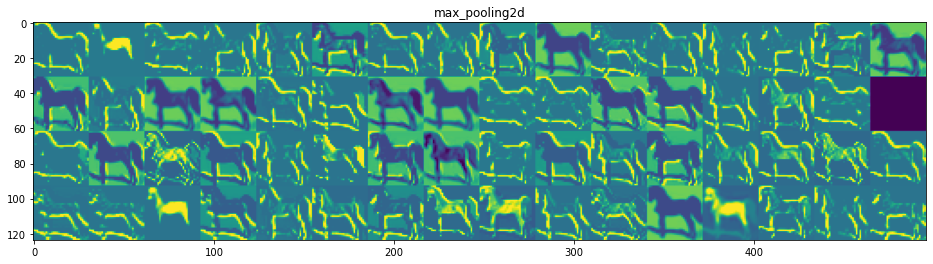

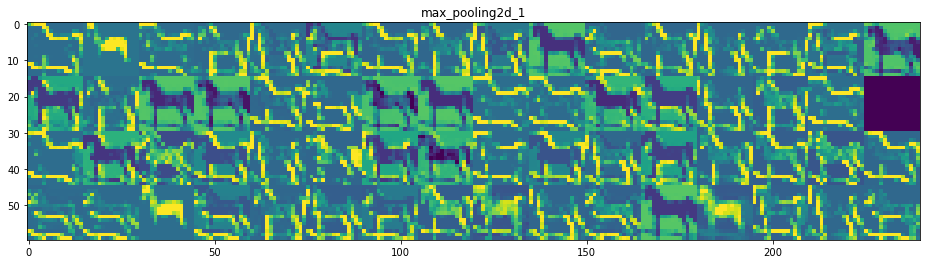

In [17]:
layer_names = []
for layer in experiment3.layers:
    if 'max_pooling' in layer.name:
        layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()